In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import copy

In [ ]:
def pixelate(img, pixel_size: int, blur=False):
    if blur:
        img = cv2.blur(img, (7, 7))

    for i in range(0, img.shape[0], pixel_size):
        for j in range(0, img.shape[1], pixel_size):
            img[i : i + pixel_size, j : j + pixel_size] = img[i][j]

    return img

(np.float64(-0.5), np.float64(2499.5), np.float64(1249.5), np.float64(-0.5))

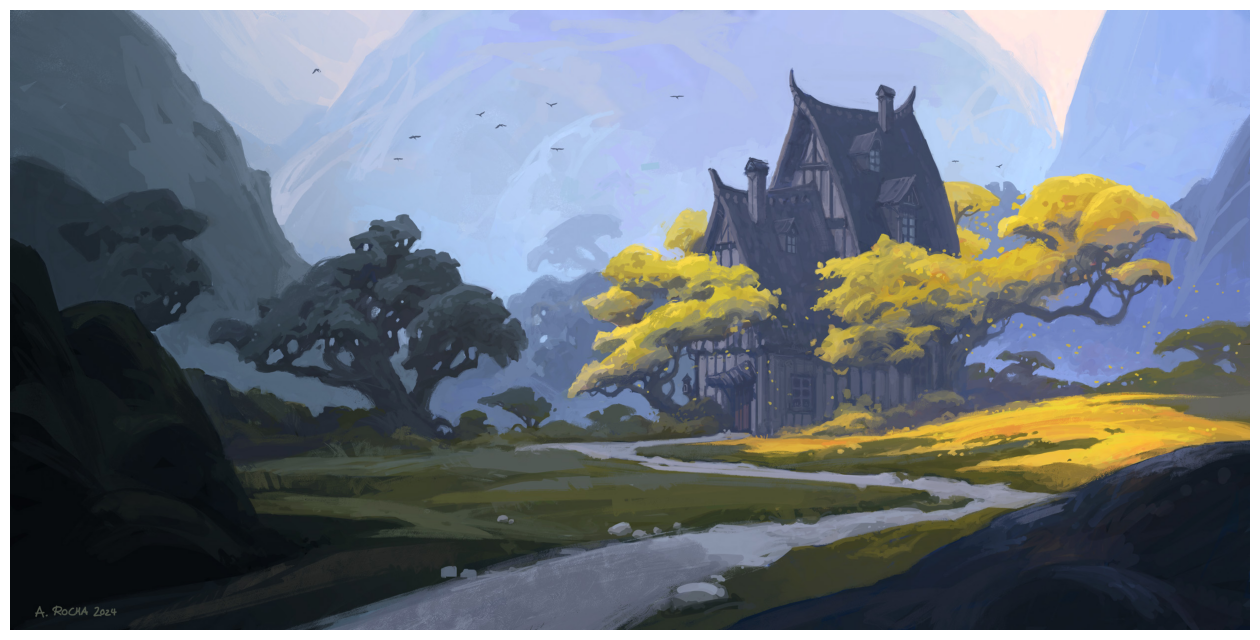

In [15]:
# img = cv2.imread('imgs/joi2.jpg')
img = cv2.imread("imgs/img1.jpeg")

plt.figure(figsize=(16, 9))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")

(1250, 2500, 3)


(np.float64(-0.5), np.float64(2499.5), np.float64(1249.5), np.float64(-0.5))

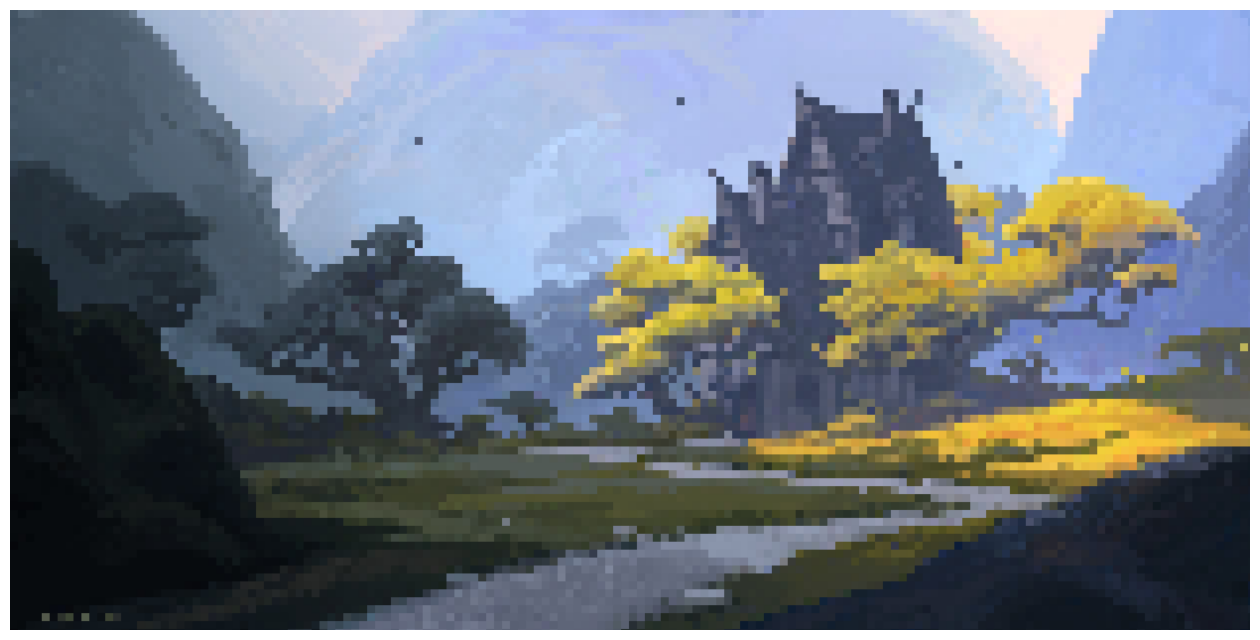

In [16]:
pixelated = pixelate(copy.deepcopy(img), pixel_size=16, blur=False)
print(pixelated.shape)
cv2.imwrite("pixelated.jpg", pixelated)

plt.figure(figsize=(16, 9))
plt.imshow(cv2.cvtColor(pixelated, cv2.COLOR_BGR2RGB))
plt.axis("off")

In [ ]:
def extract_color_palette(img, k=5):
    pixels = img.reshape((-1, 3))
    pixels = np.float32(pixels)

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    _, labels, centers = cv2.kmeans(
        pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS
    )

    # print(labels[:10])
    # print(labels[:10].flatten())
    palette = np.uint8(centers)
    return palette, labels

In [ ]:
# def normalize(color):
#     return np.array([color[0] / 255, color[1] / 255, color[2] / 255], dtype=np.float32)

def sort_by_brightness(palette):
    # https://stackoverflow.com/a/596241
    luminosity = (0.2126 * palette[:, 2] + 0.7152 * palette[:, 1] + 0.0722 * palette[:, 0])

    return palette[np.argsort(luminosity)]

def display_palette(palette, sort=False):
    swatch_size = 50
    num_colors = palette.shape[0]
    palette_image = np.zeros((swatch_size, swatch_size * num_colors, 3), dtype=np.uint8)

    if sort:
        palette = sort_by_brightness(palette)
    
    for i, color in enumerate(palette):
        palette_image[:, i * swatch_size : (i + 1) * swatch_size] = color

    return palette_image

In [123]:
palette, labels = extract_color_palette(img, k=16)

(np.float64(-0.5), np.float64(79.5), np.float64(4.5), np.float64(-0.5))

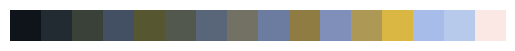

In [124]:
plt.imshow(cv2.cvtColor(display_palette(palette, sort=True), cv2.COLOR_BGR2RGB))
plt.axis("off")

In [125]:
res = palette[labels.flatten()]
res2 = res.reshape((pixelated.shape))
pixelated2 = pixelate(res2, pixel_size=16, blur=False)

(np.float64(-0.5), np.float64(2499.5), np.float64(1249.5), np.float64(-0.5))

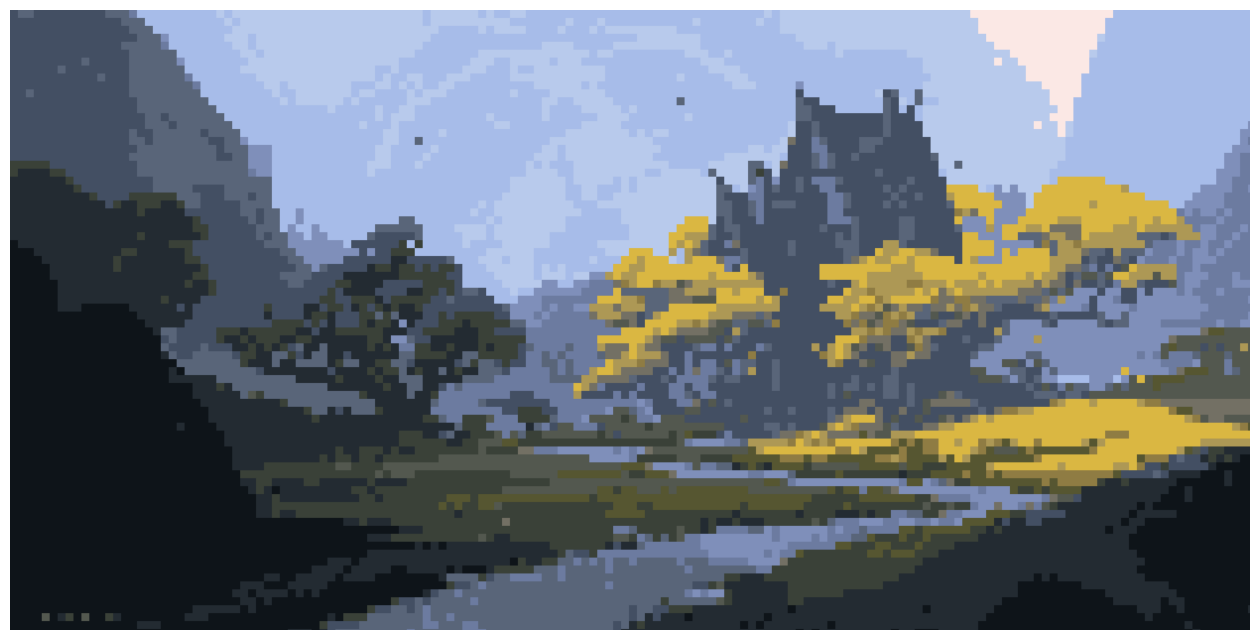

In [126]:
plt.figure(figsize=(16, 9))
plt.imshow(cv2.cvtColor(pixelated2, cv2.COLOR_BGR2RGB))
plt.axis("off")

## Resizing Version

(78, 156, 3)


(np.float64(-0.5), np.float64(155.5), np.float64(77.5), np.float64(-0.5))

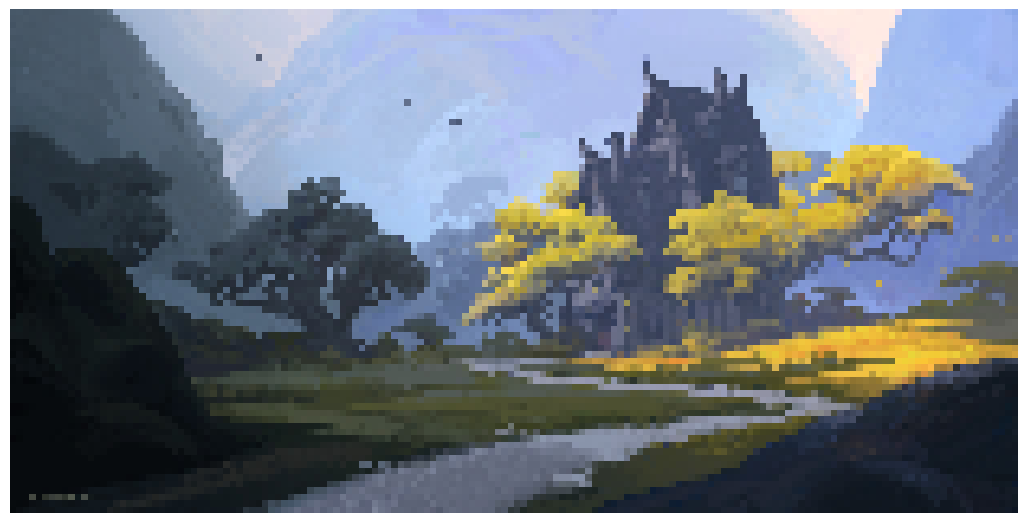

In [ ]:
img_path = "imgs/img1.jpeg"
pixel_size = 16
k_colors = 16

# Load image
img = cv2.imread(img_path)
h, w, _ = img.shape

# Resize to smaller size
small_img = cv2.resize(
    img, (w // pixel_size, h // pixel_size), interpolation=cv2.INTER_LINEAR
)
print(small_img.shape)

plt.figure(figsize=(13, 10))
plt.imshow(cv2.cvtColor(small_img, cv2.COLOR_BGR2RGB))
plt.axis("off")

In [ ]:
# Apply K-means clustering for color quantization
data = small_img.reshape((-1, 3)).astype(np.float32)
_, labels, centers = cv2.kmeans(
    data,
    k_colors,
    None,
    (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0),
    10,
    cv2.KMEANS_RANDOM_CENTERS,
)

# Convert centers to integer values
centers = np.uint8(centers)
quantized_img = centers[labels.flatten()]
quantized_img = quantized_img.reshape(small_img.shape)

# Upscale back to original size
pixelated = cv2.resize(quantized_img, (w, h), interpolation=cv2.INTER_NEAREST)

(np.float64(-0.5), np.float64(2499.5), np.float64(1249.5), np.float64(-0.5))

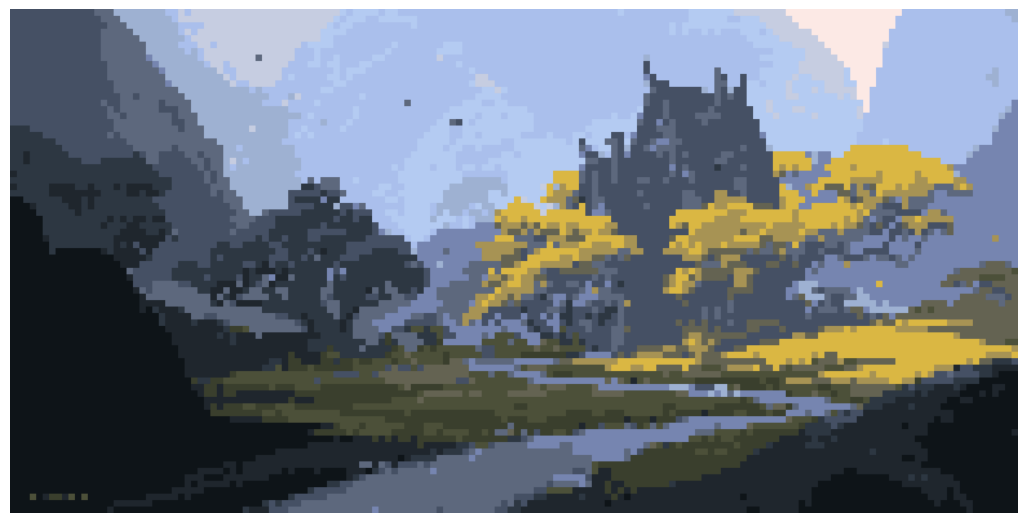

In [ ]:
cv2.imwrite("pixelated2.jpg", pixelated)
plt.figure(figsize=(13, 10))
plt.imshow(cv2.cvtColor(pixelated, cv2.COLOR_BGR2RGB))
plt.axis("off")